IMPORTING LIBRARIES
-

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READING DATASET OF LINEAR REGRESSION
- 

In [2]:
data=pd.read_csv('cardatalinear.csv')

In [6]:
data.shape

(301, 9)

PREPROCESSING STEPS
- 

1:Handling missing values
- 

In [14]:
data.dropna(inplace=True)
missing_values = data.isnull().sum()
print(missing_values)


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


Removing Duplicates
- 

In [8]:
data.drop_duplicates(inplace=True)
print("After removing duplicates, dataset have",data.shape,"rows and columns")



After removing duplicates, dataset have (299, 9) rows and columns


2:Outlier detection and removal
- 

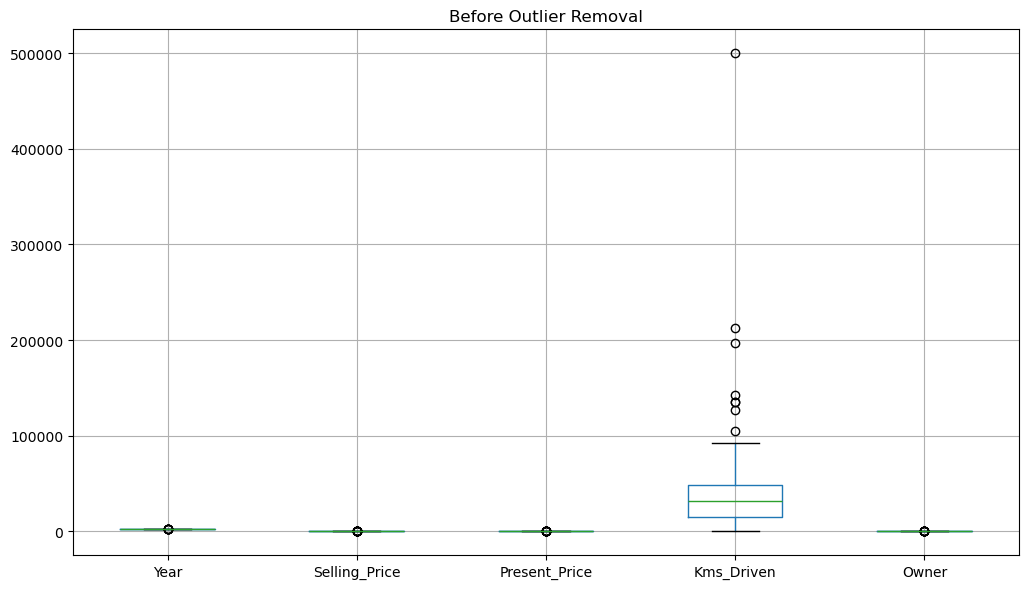

In [7]:
numeric_cols = data.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1       

data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")

plt.tight_layout()
plt.show()


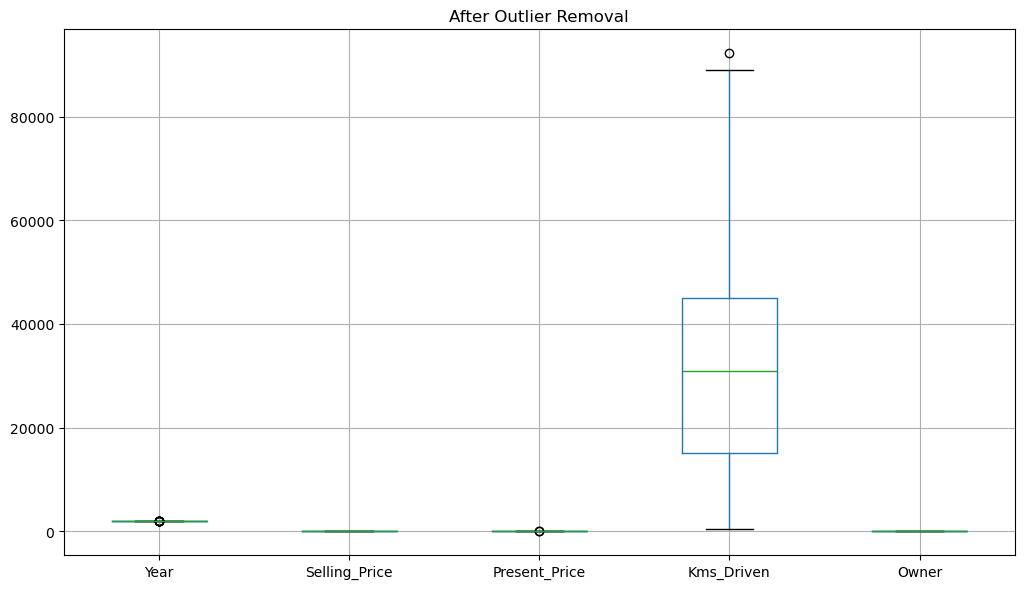

In [8]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()


In [24]:
print("Before outlier removal data is (row,column) ")
print(data.shape)
print("After outlier removal data is (row,column)")
print(data_cleaned.shape)

Before outlier removal data is (row,column) 
(301, 9)
After outlier removal data is (row,column)
(264, 9)


3:Data Transformation
- 

Data normalization
- 

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)
print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()


(301, 9)

************************************************************


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,0.733333,0.093123,0.057109,0.053053,0.0,ritz,Petrol,Dealer,Manual
1,0.666667,0.133238,0.099913,0.085085,0.0,sx4,Diesel,Dealer,Manual
2,0.933333,0.204871,0.103273,0.012813,0.0,ciaz,Petrol,Dealer,Manual
3,0.533333,0.078797,0.041504,0.009409,0.0,wagon r,Petrol,Dealer,Manual
4,0.733333,0.128940,0.070980,0.083984,0.0,swift,Diesel,Dealer,Manual


Data standardization
- 

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(301, 9)

************************************************************


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,0.128897,-0.258416,-0.236215,-0.256224,-0.174501,ritz,Petrol,Dealer,Manual
1,-0.217514,0.017481,0.221505,0.155911,-0.174501,sx4,Diesel,Dealer,Manual
2,1.168129,0.510154,0.257427,-0.773969,-0.174501,ciaz,Petrol,Dealer,Manual
3,-0.910335,-0.356950,-0.403079,-0.817758,-0.174501,wagon r,Petrol,Dealer,Manual
4,0.128897,-0.012079,-0.087890,0.141743,-0.174501,swift,Diesel,Dealer,Manual


4:Data splitting
- 

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 8), (91, 8), (210,), (91,))

5:One-Hot Encoding
- 

In [8]:
from sklearn.preprocessing import StandardScaler
data.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
data_encoded = pd.get_dummies(data, columns=cat_features)
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(data_encoded)
scaled_data = pd.DataFrame(scaled_numeric_data, columns=data_encoded.columns)

print(scaled_data.shape)
print()
print('*' * 70)
print(scaled_data.head())


(301, 110)

**********************************************************************
       Year  Selling_Price  Present_Price  Kms_Driven     Owner  Car_Name_800  \
0  0.128897      -0.258416      -0.236215   -0.256224 -0.174501     -0.057735   
1 -0.217514       0.017481       0.221505    0.155911 -0.174501     -0.057735   
2  1.168129       0.510154       0.257427   -0.773969 -0.174501     -0.057735   
3 -0.910335      -0.356950      -0.403079   -0.817758 -0.174501     -0.057735   
4  0.128897      -0.012079      -0.087890    0.141743 -0.174501     -0.057735   

   Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0           -0.081786           -0.057735               -0.057735   
1           -0.081786           -0.057735               -0.057735   
2           -0.081786           -0.057735               -0.057735   
3           -0.081786           -0.057735               -0.057735   
4           -0.081786           -0.057735               -0.057735   

   Car_Name_Baj

6:Dimentionally Data Reduction (by PCA)
- 

(301, 15)
[[-1.18412371e-01 -1.20760902e+00  7.16346417e-01 -9.35252481e-01
  -1.81311646e-01 -4.87874214e-02 -8.14130510e-01 -4.79787532e-01
  -4.13820170e-01  8.26134484e-02 -4.80856433e-01 -7.73409675e-01
  -2.07447651e-01  3.65642145e-01 -4.28192350e-01]
 [ 1.85506094e+00 -9.22375880e-01  1.47070699e+00  8.82159189e-01
  -1.20618231e+00 -2.59605547e+00  1.48630301e+00 -5.26096751e-01
  -1.29128458e-02  3.46107233e-01 -6.40548780e-02 -5.74479871e-01
  -6.98309396e-02  3.81289190e-01  4.66283103e-03]
 [ 6.49499932e-01 -1.11973592e+00 -1.19900068e+00 -9.05656943e-01
   7.00048594e-01 -3.58837704e-01 -3.12846799e-01 -6.03010749e-02
  -2.66567003e-01  3.69002113e-01 -6.76992254e-01  8.09360033e-01
  -6.05464734e-01  4.84029304e+00  1.16705151e+00]
 [-3.65205600e-01 -1.20279395e+00  1.42862186e+00 -1.30586186e+00
  -7.77167412e-01 -2.75370597e+00  3.30721875e+00  8.78107067e-01
   4.89080435e-02 -3.63338885e-01  6.69208788e-02  5.83055929e-01
   7.06777967e-02 -3.80778038e-01 -9.75928771

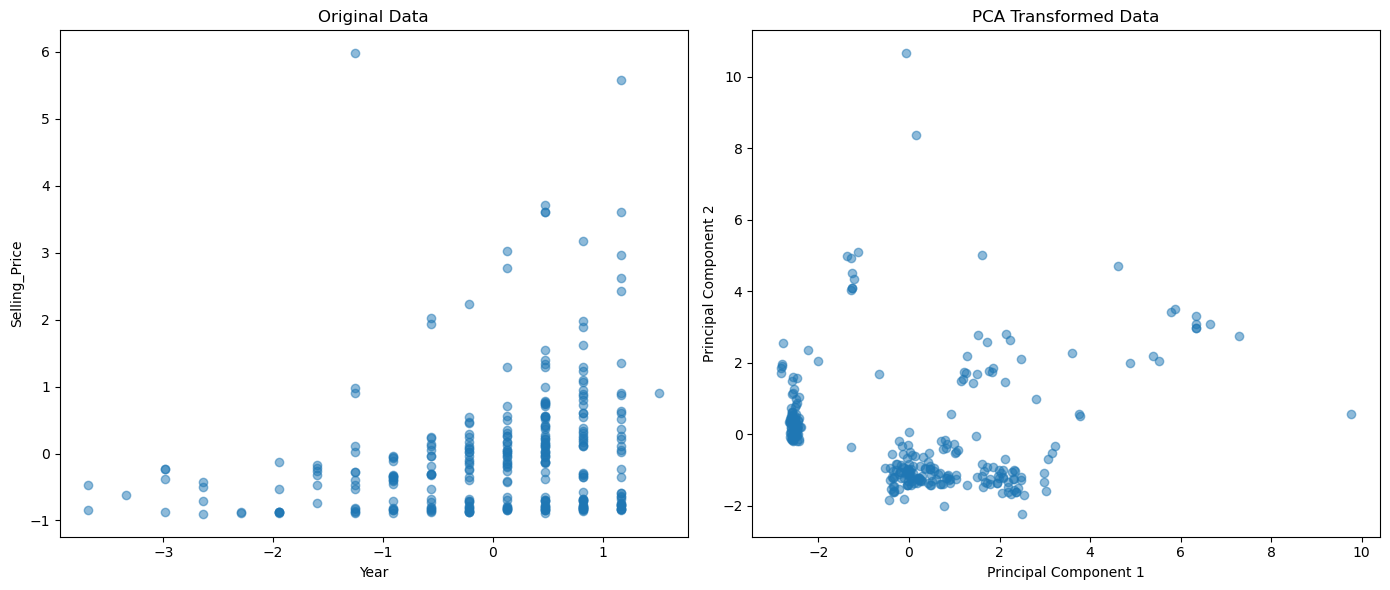

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data.fillna(data.mean(numeric_only=True), inplace=True)
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
data = pd.get_dummies(data, columns=cat_features)
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features].values)
pca = PCA(n_components=15)
data_pca = pca.fit_transform(data)
print(data_pca.shape)
print(data_pca[:5]) 
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[numeric_features[0]], data[numeric_features[1]], alpha=0.5)
plt.title('Original Data')
plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[1])
pca = PCA(n_components=15)
data_pca = pca.fit_transform(data)
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


7:Handling Imbalance Data
- 

Resampling
- 

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

data.fillna(data.mean(numeric_only=True), inplace=True)
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
data = pd.get_dummies(data, columns=cat_features)
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features].values)
if data['Selling_Price'].dtype != 'int64' and data['Selling_Price'].dtype != 'bool':
    data['Selling_Price'] = (data['Selling_Price'] > 0.5).astype(int)
X = data.drop(columns=['Selling_Price'])  
y = data['Selling_Price']  
if y.dtype == 'O':
    le = LabelEncoder()
    y = le.fit_transform(y)
print(X.shape, y.shape)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['alive'])], axis=1)
data_resampled.head()

(301, 109) (301,)


,Year,Present_Price,Kms_Driven,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,alive
0,0.128897,-0.236215,-0.256224,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148,NaN
1,-0.217514,0.221505,0.155911,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.116052,-0.100335,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148,NaN
2,1.168129,0.257427,-0.773969,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148,NaN
3,-0.910335,-0.403079,-0.817758,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,8.616844,-0.100335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148,NaN
4,0.128897,-0.087890,0.141743,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.116052,-0.100335,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148,NaN
